# Previewing variables and files

* **Difficulty level**: easy
* **Time need to lean**: 10 minutes or less
* **Key points**:
  * Magic `%preview` previews variables and files in supported format
  * Output of magic `%preview` can be saved in notebook or in console panel
  

Instant preview of intermediate results is extrmely useful for interactive data analysis. SoS provides rich and extensible preview features to

* preview variables in SoS and subkernels,
* preview files in many different formats, 
* show preview results temporarily in the side panel or permanently in the main notebook
* generate interactive tables and plots for better presentation of data both in Jupyter notebook and in converted HTML reports

### Magic `%preview`  <a id="Magic_preview"></a>

SoS provides a `%preview` magic to preview files and variables **after the completion of a cell**. Although most of the time the item specified is the name of either a file or a variable, the magic will actually show information about both a file and a variable if they happen to have the same name, as shown in the following example.

In [1]:
%preview -n df

import pandas as pd
df = pd.DataFrame(data=dict(A=['A', 'B', 'C'], B=[1, 2, 3]))

sh:
  echo something > df 

> df (10 B):

1 line

something

>>> df:

,A,B
0,A,1
1,B,2
2,C,3


## `%preview` options

In [2]:
%preview -h

usage: %preview [-h] [-k KERNEL] [-w] [-s {table,scatterplot,png}] [-r HOST]
                [-p | -n] [-c CONFIG]
                [items [items ...]]

Preview files, sos variables, or expressions in the side panel, or notebook if
side panel is not opened, unless options --panel or --notebook is specified.

positional arguments:
  items                 Filename, variable name, or expression. Wildcard
                        characters such as '*' and '?' are allowed for
                        filenames.

optional arguments:
  -h, --help            show this help message and exit
  -k KERNEL, --kernel KERNEL
                        kernel in which variables will be previewed. By
                        default the variable will be previewed in the current
                        kernel of the cell.
  -w, --workflow        Preview notebook workflow
  -s {table,scatterplot,png}, --style {table,scatterplot,png}
                        Option for preview file or variable, which by default


### Preview in notebook or panel (options `-n` and `-p`)

By default, `%preview` displays results in the side panel if the side panel is open, and otherwise in the main notebook. You can override this behavior with options `-p` (`--panel`) or `-n` (`--notebook`) to always display results in the console panel or notebook. This is why we use `-n` most of the time in this tutorial to keep the preview results in this notebook.

For example, with option `-p`, the preview result will not be saved in notebook, even if the console panel is not open.

In [3]:
%preview df -p

### Preview embedded SoS workflow (option `--workflow`)

If option `-w` (`--workflow`) is specified, sos collects workflow steps from the current notebook and preview it. This would give you a better sense of what would be converted with magic `%convert --to sos` or executed with magic `%sosrun`.

In [4]:
[step_1]
print('Step 1 of workflow')

In [5]:
[step_2]
print('Step 2 of workflow')

In [6]:
%preview --workflow

#!/usr/bin/env sos-runner
#fileformat=SOS1.0

[step_1]
print('Step 1 of workflow')

[step_2]
print('Step 2 of workflow')



### Preview variables from another kernel (option `-k`, `--kernel`)

The `%preview` magic previews the variables with the kernel using which the cell is evaluated. For example, even if you have `var` defined in both SoS and `R` kernel,

In [7]:
val = [2,3]*2

In [8]:
%preview -n val

>>> val:

[2, 3, 2, 3]

In [9]:
val = rep(c(1, 2), 3)

In [10]:
%preview -n val

>>> val:

 num [1:6] 1 2 1 2 1 2


If you would like to preview variable in another kernel, you can specify it using option `--kernel`, for example, the following cell previews a variable `r.val` in a SoS kernel.

In [11]:
%preview -n val --kernel R

>>> val:

 num [1:6] 1 2 1 2 1 2


### Preview files on remote host (option `-r`)

When a workflow or a task is executed remotely (see [Remote Execution](remote_execution.html) for details, result files might be on a remote host that is unavailable for local preview. 

For example, you can execute a workflow on a remote host `bcb` to generate a file (`mygraphic.png`) and use `%preview -r bcb` to preview it.

INFO: No matching tasks are identified. Use option -a to check all tasks.


INFO: Running default: 


null device 


          1 


INFO: default is completed.


INFO: Workflow default (ID=18c4690c87e02c14) is executed successfully with 1 completed step.


> mygraphic.png (13.1 KiB):

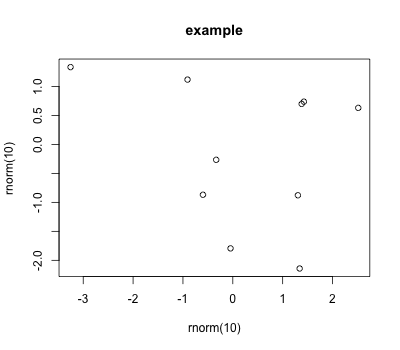

In [12]:
%preview -n mygraphic.png -r bcb
%run -r bcb
R:
  png(file="mygraphic.png",width=400,height=350)
  plot(x=rnorm(10),y=rnorm(10),main="example")
  dev.off()


## Preview of variables

### Preview variable in SoS kernel

In [13]:
%preview -n var1 var2
var1 = ["apple", "banana", "cherry"]
var2 = {x:len(x) for x in var1}

>>> var1:

['apple', 'banana', 'cherry']

>>> var2:

{'apple': 5, 'banana': 6, 'cherry': 6}

### Preview variables in subkernels

In [14]:
%preview -n mtcars

>>> mtcars:

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


In [15]:
%preview a
a = [1 2 3];

### Preview of pandas DataFrame

If a data to be previewed is a Pandas DataFrame (or a csv or excel file which would be previewed as a DataFrame), SoS will preview it as a sortable and searchable table. For example, the following cell get a data.frame `mtcar` from the R kernel (as a pandas DataFrame) and preview it in the main notebook:

In [16]:
%get mtcars --from R
%preview -n mtcars 

>>> mtcars:

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6.0,160.0,110.0,3.90,2.620,16.46,0.0,1.0,4.0,4.0
Mazda RX4 Wag,21.0,6.0,160.0,110.0,3.90,2.875,17.02,0.0,1.0,4.0,4.0
Datsun 710,22.8,4.0,108.0,93.0,3.85,2.320,18.61,1.0,1.0,4.0,1.0
Hornet 4 Drive,21.4,6.0,258.0,110.0,3.08,3.215,19.44,1.0,0.0,3.0,1.0
Hornet Sportabout,18.7,8.0,360.0,175.0,3.15,3.440,17.02,0.0,0.0,3.0,2.0
Valiant,18.1,6.0,225.0,105.0,2.76,3.460,20.22,1.0,0.0,3.0,1.0
Duster 360,14.3,8.0,360.0,245.0,3.21,3.570,15.84,0.0,0.0,3.0,4.0
Merc 240D,24.4,4.0,146.7,62.0,3.69,3.190,20.00,1.0,0.0,4.0,2.0
Merc 230,22.8,4.0,140.8,95.0,3.92,3.150,22.90,1.0,0.0,4.0,2.0
Merc 280,19.2,6.0,167.6,123.0,3.92,3.440,18.30,1.0,0.0,4.0,4.0


Compared to previewing the same variable in R, you have the addition features of

1. sorting table by clicking the sort icon at the header of each column
2. displaying a subset of rows that matches specified text in the input text

Note that SoS by default outputs the first 200 rows of the table. You can use option `-l` (`--limit`) to change this threshold.

## Preview of files

The `%preview` magic can be used to preview files in a variety of formats. 

### Preview of figures

SoS can preview figures in multiple formats including `.png`, `.jpg`, and `.gif`. For example, the following magic previews a `png` figure generated in R.

pdf 
  2

> test.png (20.5 KiB):

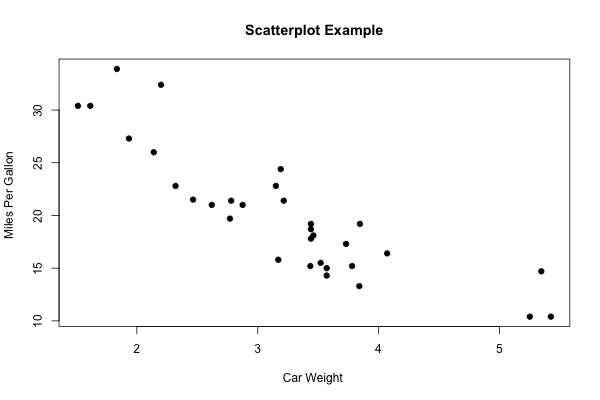

In [17]:
%preview test.png -n
png('test.png', width=600, height=400)
attach(mtcars)
plot(wt, mpg, main="Scatterplot Example", 
  xlab="Car Weight ", ylab="Miles Per Gallon ", pch=19)
dev.off()

### Preview of pdf files

Note that SoS by default preview PDF files as an embeded object (iframe), but you can use option `-s png` to convert PDF to png to preview it as a image, if you have imagematick and Python package `wand` installed.

| Option | description|
|--|--|
| `--style png` (`-s png`)| Convert PDF to png before preview. All pages are combined to produce a sngle PNG figure if the pdf file contains multiple pages. This option requires Python module `wand`.|
| `--pages 2 3 `| With `--style png`, preview specified pages (page numbers starting from 1) from a multi-page PDF file. |


### Preview of bioinformatics-specific formats (module `sos-bioinfo`)

SoS uses a modular design and allows the definition of previewers in separate modules. For example, with the installation of module `sos-bioinfo` (and required packages such as `pysam`), you can preview bioinformatics-specific formats such as `.VCF` and `.bam`.

In [18]:
%preview -n issue225.bam
download:
  https://github.com/lomereiter/sambamba/raw/master/test/issue225.bam

0

> issue225.bam (4.2 KiB):

RG:
  ID: '16-3584'    PL: 'illumina'    PU: '16-3584'    SM: '16-3584'    
SQ:
  SN: 'chrM'    LN: 16571    


## Further reading

* [SoS magics](sos_magics.html)